## Cargando  las librerías

In [55]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Importar clasificador de Decision Tree 
from sklearn.model_selection import train_test_split # Importar función train_test_split 
from sklearn import metrics #Importar scikit-learn metrics para calcular la precisión

## Cargando datos

In [56]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label'] # seleccionando las columnas que salen
# cargando dataset
pima = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", header=None, names=col_names)
pima.head() # leyendo los cinco primeros registros

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Seleccionando características

In [57]:
#Se dividen las columnas dadas en dos tipos de variables dependientes (o variables objetivo) 
#y variables independientes (o variables de características).
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # características
y = pima.label # variable objetivo

## Dividiendo datos

In [58]:
# Para comprender mejor el modelo, se divide el conjunto de datos en un conjunto
# De entrenamiento y un conjunto de prueba. Para esto se usa Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% entrenamiento y 30% prueba

## Creación del modelo del árbol de decisión

In [59]:
#Creando el árbol
clf = DecisionTreeClassifier()
#Entrenar el clasificador del árbol
clf = clf.fit(X_train,y_train)
# Predecir la respuesta para el test del dataset
y_pred = clf.predict(X_test)

## Modelo de evaluación de precisión

In [60]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6926406926406926


## Visualizando el árbol de decisión

In [61]:
# Instalando librerías para gráficos
%pip install graphviz



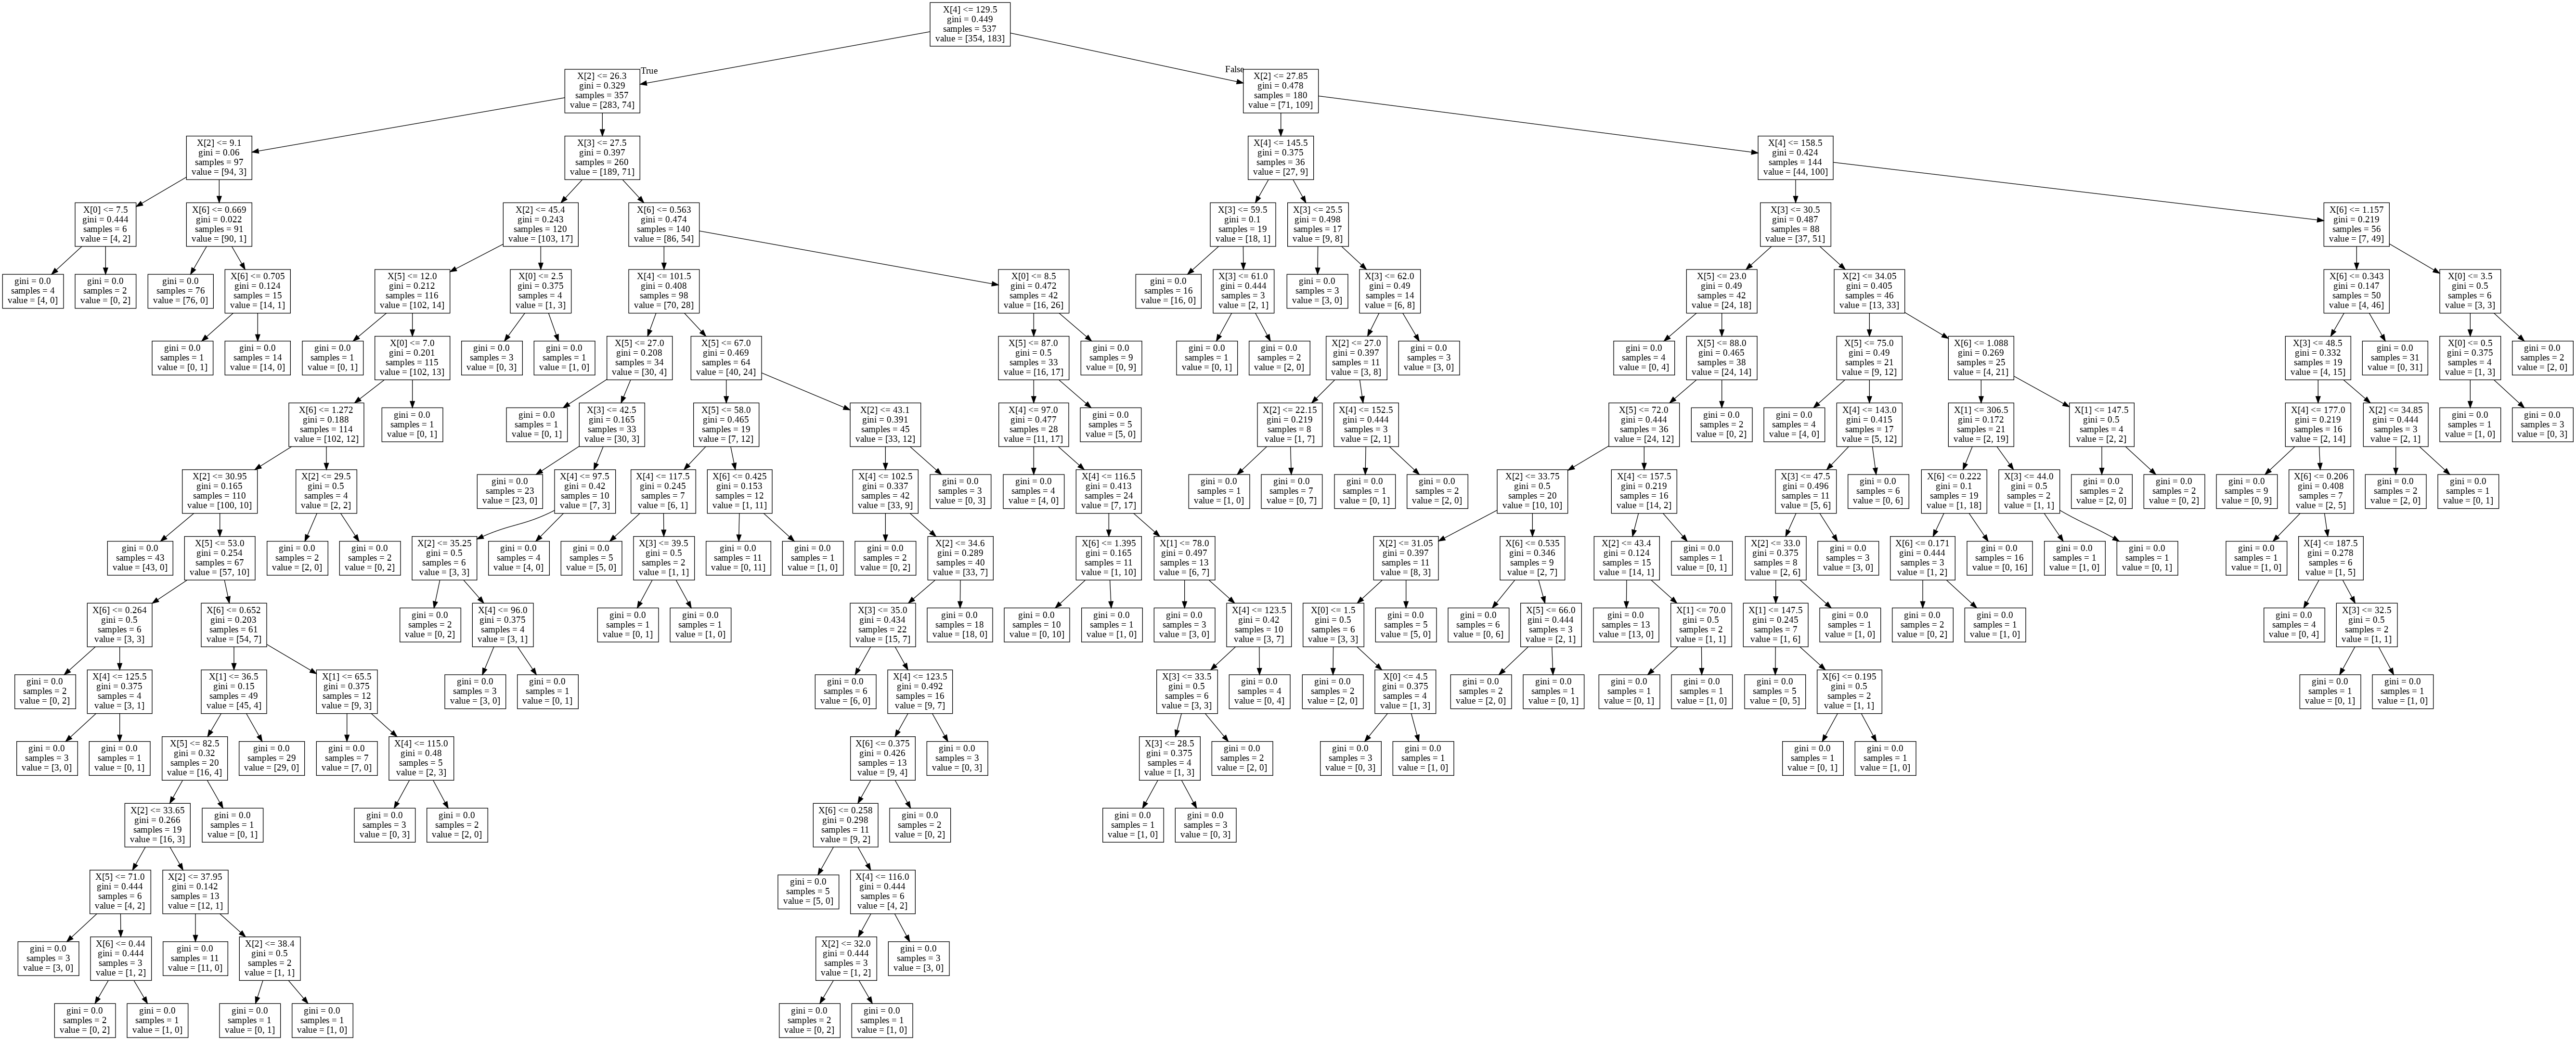

In [62]:
# Haciendo el gráfico
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
dot_data = export_graphviz(clf)
graph = graph_from_dot_data(dot_data)
graph.write_png('diabetes.png')
Image(graph.create_png())